# Laboratorio 1 - Aprendizaje de Máquina

## Miembros del grupo

| Nombre             | Código    | Correo electrónico           |
|--------------------|-----------|------------------------------|
| Adrian Velasquez   | 202222737 | a.velasquezs@uniandes.edu.co |
| Andres Botero Ruiz | 202223503 | a.boteror@uniandes.edu.co    |

# Preparación del entorno de trabajo

In [2546]:
# Importar las librerías necesarias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.impute import SimpleImputer

In [2547]:
# Folders and constants
DATA_FOLDER = 'data/'
DATA_FILE = DATA_FOLDER + 'data.csv'
TEST_FILE = DATA_FOLDER + 'test.csv'
MODELS_FOLDER = 'models/'
MODEL = MODELS_FOLDER + 'model.pkl'

## Lectura de los datos

In [2548]:
# Leer el archivo CSV con los datos de entrenamiento
df = pd.read_csv( DATA_FILE )
df.head()


,Patient ID,Date of Service,Sex,Age,Weight (kg),Height (m),BMI,Abdominal Circumference (cm),Blood Pressure (mmHg),Total Cholesterol (mg/dL),...,Physical Activity Level,Family History of CVD,Height (cm),Waist-to-Height Ratio,Systolic BP,Diastolic BP,Blood Pressure Category,Estimated LDL (mg/dL),CVD Risk Score,CVD Risk Level
0,isDx5313,"November 08, 2023",M,44.0,114.300,1.720,38.600,100.000,112/83,228.0,...,High,N,172.000,0.581,112.0,83.0,Hypertension Stage 1,121.0,19.880,HIGH
1,LHCK2961,20/03/2024,F,57.0,92.923,1.842,33.116,106.315,101/91,158.0,...,High,Y,184.172,0.577,101.0,91.0,Hypertension Stage 2,57.0,16.833,INTERMEDIARY
2,WjVn1699,2021-05-27,F,NaN,73.400,1.650,27.000,78.100,90/74,135.0,...,High,N,165.000,0.473,90.0,74.0,Normal,45.0,12.600,LOW
3,dCDO1109,"April 18, 2022",F,35.0,113.300,1.780,35.800,79.600,92/89,158.0,...,Moderate,Y,178.000,0.447,92.0,89.0,Hypertension Stage 1,94.0,14.920,HIGH
4,pnpE1080,01/11/2024,F,48.0,102.200,1.750,33.400,106.700,121/68,207.0,...,Low,Y,175.000,0.610,121.0,68.0,Elevated,128.0,18.870,HIGH


# Exploración de los datos

In [2549]:
df.shape

(1639, 24)

In [2550]:
# Obtener información general sobre el DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1639 entries, 0 to 1638
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Patient ID                    1639 non-null   object 
 1   Date of Service               1639 non-null   object 
 2   Sex                           1639 non-null   object 
 3   Age                           1571 non-null   float64
 4   Weight (kg)                   1566 non-null   float64
 5   Height (m)                    1578 non-null   float64
 6   BMI                           1586 non-null   float64
 7   Abdominal Circumference (cm)  1578 non-null   float64
 8   Blood Pressure (mmHg)         1639 non-null   object 
 9   Total Cholesterol (mg/dL)     1571 non-null   float64
 10  HDL (mg/dL)                   1557 non-null   float64
 11  Fasting Blood Sugar (mg/dL)   1585 non-null   float64
 12  Smoking Status                1639 non-null   object 
 13  Dia

In [2551]:
# Obtener estadísticas descriptivas de las columnas numéricas
df.describe()

,Age,Weight (kg),Height (m),BMI,Abdominal Circumference (cm),Total Cholesterol (mg/dL),HDL (mg/dL),Fasting Blood Sugar (mg/dL),Height (cm),Waist-to-Height Ratio,Systolic BP,Diastolic BP,Estimated LDL (mg/dL),CVD Risk Score
count,1571.000000,1566.000000,1578.000000,1586.000000,1578.000000,1571.000000,1557.000000,1585.000000,1571.000000,1563.000000,1578.000000,1554.000000,1582.000000,1610.000000
mean,46.803186,85.666006,1.757439,28.424744,91.538861,199.043673,56.183558,117.836860,175.770082,0.522440,125.632637,82.887536,113.235896,18.227281
std,13.039479,21.712504,0.118012,7.309275,13.427985,59.388670,16.721702,32.379634,11.695880,0.085692,22.577463,15.503625,61.435291,10.767666
min,6.134000,13.261000,1.371000,4.317000,49.542000,-1.256000,0.008000,15.306000,136.498000,0.250000,49.914000,31.720000,-92.055000,-20.057000
25%,37.000000,67.100000,1.666500,22.600000,79.700000,150.000000,42.000000,92.000000,167.000000,0.453000,108.000000,71.000000,62.000000,15.150000
50%,46.000000,86.314000,1.760000,28.000000,91.200000,199.000000,56.000000,115.000000,176.000000,0.519000,125.000000,82.000000,112.000000,16.967000
75%,55.000000,104.801500,1.850000,33.963000,102.267250,250.000000,70.000000,139.000000,185.000000,0.582000,141.000000,93.000000,159.000000,18.900000
max,89.420000,158.523000,2.146000,53.028000,136.336000,385.679000,110.315000,219.667000,214.394000,0.804000,202.711000,134.066000,317.314000,114.980000


In [2552]:
# Verificar los valores nulos en el DataFrame
df.isnull().sum()

Patient ID                       0
Date of Service                  0
Sex                              0
Age                             68
Weight (kg)                     73
Height (m)                      61
BMI                             53
Abdominal Circumference (cm)    61
Blood Pressure (mmHg)            0
Total Cholesterol (mg/dL)       68
HDL (mg/dL)                     82
Fasting Blood Sugar (mg/dL)     54
Smoking Status                   0
Diabetes Status                  0
Physical Activity Level          0
Family History of CVD            0
Height (cm)                     68
Waist-to-Height Ratio           76
Systolic BP                     61
Diastolic BP                    85
Blood Pressure Category          0
Estimated LDL (mg/dL)           57
CVD Risk Score                  29
CVD Risk Level                   0
dtype: int64

In [2553]:
# Verificar duplicados totales
dupes = df.duplicated().sum()
print(f'Número de filas totalmente duplicadas: {dupes}')

Número de filas totalmente duplicadas: 151


In [2554]:
# Obtener listado de columnas no-numéricas
non_num_cols = df.select_dtypes(include=['object']).columns
print(f'Columnas categóricas: {list(non_num_cols)}')

Columnas categóricas: ['Patient ID', 'Date of Service', 'Sex', 'Blood Pressure (mmHg)', 'Smoking Status', 'Diabetes Status', 'Physical Activity Level', 'Family History of CVD', 'Blood Pressure Category', 'CVD Risk Level']


In [2555]:
# Obtener listado de columnas numéricas
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
print(f'Columnas numéricas: {list(num_cols)}')

Columnas numéricas: ['Age', 'Weight (kg)', 'Height (m)', 'BMI', 'Abdominal Circumference (cm)', 'Total Cholesterol (mg/dL)', 'HDL (mg/dL)', 'Fasting Blood Sugar (mg/dL)', 'Height (cm)', 'Waist-to-Height Ratio', 'Systolic BP', 'Diastolic BP', 'Estimated LDL (mg/dL)', 'CVD Risk Score']


# Preparación de los datos

Nuestro objetivo final será un modelo de predicción (regresión lineal) para la variable CVD Risk Score (puntaje de riesgo cardiovascular)

## Remover duplicados y valores nulos en la columna objetivo

In [2556]:
# Remover duplicados totales
df_limpieza = df.drop_duplicates()
# Verificar nuevamente los duplicados totales
dupes = df_limpieza.duplicated().sum()
print(f'Número de filas totalmente duplicadas: {dupes}')

Número de filas totalmente duplicadas: 0


In [2557]:
df_limpieza.shape

(1488, 24)

In [2558]:
# Eliminar filas con valores nulos en la variable objetivo (CVD Risk Score)
df_limpieza = df.dropna(subset=['CVD Risk Score'])
# Verificar nuevamente los valores nulos en la variable objetivo
null_target = df_limpieza['CVD Risk Score'].isnull().sum()
print(f'Número de filas con valores nulos en CVD Risk Score: {null_target}')

Número de filas con valores nulos en CVD Risk Score: 0


In [2559]:
df_limpieza.shape

(1610, 24)

## Transformar columnas de fecha -> Consistencia de los datos

La columna fecha no parece tener un formato consistente, por lo que la convertiremos a un formato de fecha estándar (datetime) para facilitar su manejo en el futuro

In [2560]:
# Transformar la columna 'Date of Service' a formato datetime, manejando posibles inconsistencias en el formato de fecha

# TODO: tener en cuenta para el pipeline

# Primero, eliminamos espacios en blanco y caracteres no deseados
df_limpieza['Date of Service'] = (
    df_limpieza['Date of Service'].copy()
    .astype(str)
    .str.strip()
    .str.replace(r'\s+', ' ', regex=True)
)

# Luego, intentamos convertir a datetime utilizando un formato mixto, permitiendo que pandas infiera el formato correcto
df_limpieza['Date of Service'] = pd.to_datetime(
    df_limpieza['Date of Service'],
    format='mixed',
    dayfirst=True,
    errors='coerce'
)

# Verificar si hay valores que no se pudieron convertir a fecha (serán NaT)
null_dates = df_limpieza['Date of Service'].isnull().sum()
print(f'Número de filas con valores "coerced": {null_dates}')

df_limpieza.head()


Número de filas con valores "coerced": 0


C:\Users\mie\AppData\Local\Temp\ipykernel_26316\4157103209.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_limpieza['Date of Service'] = (
C:\Users\mie\AppData\Local\Temp\ipykernel_26316\4157103209.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_limpieza['Date of Service'] = pd.to_datetime(


,Patient ID,Date of Service,Sex,Age,Weight (kg),Height (m),BMI,Abdominal Circumference (cm),Blood Pressure (mmHg),Total Cholesterol (mg/dL),...,Physical Activity Level,Family History of CVD,Height (cm),Waist-to-Height Ratio,Systolic BP,Diastolic BP,Blood Pressure Category,Estimated LDL (mg/dL),CVD Risk Score,CVD Risk Level
0,isDx5313,2023-11-08,M,44.0,114.300,1.720,38.600,100.000,112/83,228.0,...,High,N,172.000,0.581,112.0,83.0,Hypertension Stage 1,121.0,19.880,HIGH
1,LHCK2961,2024-03-20,F,57.0,92.923,1.842,33.116,106.315,101/91,158.0,...,High,Y,184.172,0.577,101.0,91.0,Hypertension Stage 2,57.0,16.833,INTERMEDIARY
2,WjVn1699,2021-05-27,F,NaN,73.400,1.650,27.000,78.100,90/74,135.0,...,High,N,165.000,0.473,90.0,74.0,Normal,45.0,12.600,LOW
3,dCDO1109,2022-04-18,F,35.0,113.300,1.780,35.800,79.600,92/89,158.0,...,Moderate,Y,178.000,0.447,92.0,89.0,Hypertension Stage 1,94.0,14.920,HIGH
4,pnpE1080,2024-11-01,F,48.0,102.200,1.750,33.400,106.700,121/68,207.0,...,Low,Y,175.000,0.610,121.0,68.0,Elevated,128.0,18.870,HIGH


## Completitud de los datos

### Rellenar nulos

In [2561]:
# Verificar la proporción de valores nulos en cada columna
((df_limpieza.isnull().sum()/df_limpieza.shape[0])).sort_values(ascending=False)

Diastolic BP                    0.051553
HDL (mg/dL)                     0.050932
Waist-to-Height Ratio           0.047205
Weight (kg)                     0.044720
Total Cholesterol (mg/dL)       0.042236
Height (cm)                     0.042236
Age                             0.041615
Height (m)                      0.037267
Systolic BP                     0.037267
Abdominal Circumference (cm)    0.036646
Estimated LDL (mg/dL)           0.035404
Fasting Blood Sugar (mg/dL)     0.032919
BMI                             0.031677
Date of Service                 0.000000
Sex                             0.000000
Patient ID                      0.000000
Family History of CVD           0.000000
Physical Activity Level         0.000000
Diabetes Status                 0.000000
Smoking Status                  0.000000
Blood Pressure (mmHg)           0.000000
Blood Pressure Category         0.000000
CVD Risk Score                  0.000000
CVD Risk Level                  0.000000
dtype: float64

In [2562]:
# Extraer columnas con nulos y su tipo de dato
cols_with_nulls = df_limpieza.columns[df_limpieza.isnull().any()]
cols_with_nulls_types = df_limpieza[cols_with_nulls].dtypes
print("Columnas con valores nulos y su tipo de dato:")
for col, dtype in cols_with_nulls_types.items():
    print(f"{dtype}: {col}")

Columnas con valores nulos y su tipo de dato:
float64: Age
float64: Weight (kg)
float64: Height (m)
float64: BMI
float64: Abdominal Circumference (cm)
float64: Total Cholesterol (mg/dL)
float64: HDL (mg/dL)
float64: Fasting Blood Sugar (mg/dL)
float64: Height (cm)
float64: Waist-to-Height Ratio
float64: Systolic BP
float64: Diastolic BP
float64: Estimated LDL (mg/dL)


Dado que todas las columnas con nulos son numéricas, podemos usar un imputer para rellenar los valores nulos con la media de cada columna

In [2563]:
# Imputer para rellenar los valores nulos en las columnas numéricas con la media

df_imputer = df_limpieza.copy()

si = SimpleImputer(missing_values=np.nan, strategy='mean')
si.fit(df_imputer[cols_with_nulls]) # hacemos fit utilizando las columnas con nulos
filled_cols = si.transform(df_imputer[cols_with_nulls]) # transformamos las columnas con nulos

# Reemplazamos las columnas originales con nulos por las columnas rellenadas
df_imputer[cols_with_nulls] = filled_cols

df_imputer.isnull().sum()

Patient ID                      0
Date of Service                 0
Sex                             0
Age                             0
Weight (kg)                     0
Height (m)                      0
BMI                             0
Abdominal Circumference (cm)    0
Blood Pressure (mmHg)           0
Total Cholesterol (mg/dL)       0
HDL (mg/dL)                     0
Fasting Blood Sugar (mg/dL)     0
Smoking Status                  0
Diabetes Status                 0
Physical Activity Level         0
Family History of CVD           0
Height (cm)                     0
Waist-to-Height Ratio           0
Systolic BP                     0
Diastolic BP                    0
Blood Pressure Category         0
Estimated LDL (mg/dL)           0
CVD Risk Score                  0
CVD Risk Level                  0
dtype: int64

In [2564]:
# Verificamos nuevamente la proporción de valores nulos en cada columna
((df_imputer.isnull().sum()/df_imputer.shape[0])).sort_values(ascending=False)

Patient ID                      0.0
Date of Service                 0.0
Sex                             0.0
Age                             0.0
Weight (kg)                     0.0
Height (m)                      0.0
BMI                             0.0
Abdominal Circumference (cm)    0.0
Blood Pressure (mmHg)           0.0
Total Cholesterol (mg/dL)       0.0
HDL (mg/dL)                     0.0
Fasting Blood Sugar (mg/dL)     0.0
Smoking Status                  0.0
Diabetes Status                 0.0
Physical Activity Level         0.0
Family History of CVD           0.0
Height (cm)                     0.0
Waist-to-Height Ratio           0.0
Systolic BP                     0.0
Diastolic BP                    0.0
Blood Pressure Category         0.0
Estimated LDL (mg/dL)           0.0
CVD Risk Score                  0.0
CVD Risk Level                  0.0
dtype: float64

In [2565]:
# Guardamos el DataFrame limpio en el DataFrame de limpieza para continuar con el proceso de modelado
df_limpieza = df_imputer.copy()
df_limpieza.head()

,Patient ID,Date of Service,Sex,Age,Weight (kg),Height (m),BMI,Abdominal Circumference (cm),Blood Pressure (mmHg),Total Cholesterol (mg/dL),...,Physical Activity Level,Family History of CVD,Height (cm),Waist-to-Height Ratio,Systolic BP,Diastolic BP,Blood Pressure Category,Estimated LDL (mg/dL),CVD Risk Score,CVD Risk Level
0,isDx5313,2023-11-08,M,44.000000,114.300,1.720,38.600,100.000,112/83,228.0,...,High,N,172.000,0.581,112.0,83.0,Hypertension Stage 1,121.0,19.880,HIGH
1,LHCK2961,2024-03-20,F,57.000000,92.923,1.842,33.116,106.315,101/91,158.0,...,High,Y,184.172,0.577,101.0,91.0,Hypertension Stage 2,57.0,16.833,INTERMEDIARY
2,WjVn1699,2021-05-27,F,46.769697,73.400,1.650,27.000,78.100,90/74,135.0,...,High,N,165.000,0.473,90.0,74.0,Normal,45.0,12.600,LOW
3,dCDO1109,2022-04-18,F,35.000000,113.300,1.780,35.800,79.600,92/89,158.0,...,Moderate,Y,178.000,0.447,92.0,89.0,Hypertension Stage 1,94.0,14.920,HIGH
4,pnpE1080,2024-11-01,F,48.000000,102.200,1.750,33.400,106.700,121/68,207.0,...,Low,Y,175.000,0.610,121.0,68.0,Elevated,128.0,18.870,HIGH


## Unicidad

### Duplicados parciales

In [2566]:
# Verificar duplicados parciales -> Patient ID
dupes_patient_id = df_limpieza.duplicated(subset=['Patient ID']).sum()
print(f'Número de filas con Patient ID duplicado: {dupes_patient_id}')

Número de filas con Patient ID duplicado: 261


In [2567]:
# Evaluar posibilidad de diferentes filas con el mismo Patient ID
dupes_patient_id_date = df_limpieza.duplicated(subset=['Patient ID', 'Date of Service']).sum()
print(f'Número de filas con Patient ID y Date of Service duplicados: {dupes_patient_id_date}')

dupes_patient_id_age = df_limpieza.duplicated(subset=['Patient ID', 'Age']).sum()
print(f'Número de filas con Patient ID y Age duplicados: {dupes_patient_id_age}')

dupes_patient_id_date_age = df_limpieza.duplicated(subset=['Patient ID', 'Date of Service', 'Age']).sum()
print(f'Número de filas con Patient ID, Date of Service y Age duplicados: {dupes_patient_id_date_age}')

df_duplicates = df[df.duplicated(subset="Patient ID", keep=False)].sort_values(by="Patient ID")

df_duplicates

Número de filas con Patient ID y Date of Service duplicados: 261
Número de filas con Patient ID y Age duplicados: 261
Número de filas con Patient ID, Date of Service y Age duplicados: 261


,Patient ID,Date of Service,Sex,Age,Weight (kg),Height (m),BMI,Abdominal Circumference (cm),Blood Pressure (mmHg),Total Cholesterol (mg/dL),...,Physical Activity Level,Family History of CVD,Height (cm),Waist-to-Height Ratio,Systolic BP,Diastolic BP,Blood Pressure Category,Estimated LDL (mg/dL),CVD Risk Score,CVD Risk Level
17,AhYt1346,09-28-2020,M,41.0,71.300,1.730,23.800,107.900,139/61,253.0,...,Low,Y,173.000,NaN,139.0,NaN,Hypertension Stage 1,146.0,16.770,HIGH
1584,AhYt1346,09-28-2020,M,41.0,71.300,1.730,23.800,107.900,139/61,253.0,...,Low,Y,173.000,NaN,139.0,NaN,Hypertension Stage 1,146.0,16.770,HIGH
1227,AhYt1346,09-28-2020,M,41.0,71.300,1.730,23.800,107.900,139/61,253.0,...,Low,Y,173.000,NaN,139.0,NaN,Hypertension Stage 1,146.0,-13.090,HIGH
1117,Axab9332,2021-12-11,F,58.0,69.870,1.944,20.785,86.259,162/106,151.0,...,Moderate,N,194.450,0.444,162.0,106.0,Hypertension Stage 2,44.0,23.430,HIGH
383,Axab9332,2021-12-11,F,58.0,69.870,1.944,20.785,86.259,162/106,151.0,...,Moderate,N,194.450,0.444,162.0,106.0,Hypertension Stage 2,44.0,15.277,HIGH
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
956,zhZi8857,"December 05, 2025",F,36.0,81.200,1.750,26.500,74.000,141/76,225.0,...,Moderate,Y,175.000,0.423,141.0,NaN,Hypertension Stage 2,164.0,16.850,HIGH
727,zhZi8857,"December 05, 2025",F,36.0,81.200,1.750,26.500,74.000,141/76,225.0,...,Moderate,Y,175.000,0.423,141.0,NaN,Hypertension Stage 2,164.0,41.813,HIGH
1548,zhZi8857,"December 05, 2025",F,36.0,81.200,1.750,26.500,74.000,141/76,225.0,...,Moderate,Y,175.000,0.423,141.0,NaN,Hypertension Stage 2,164.0,16.850,HIGH
1565,zxhX5525,"November 13, 2021",M,26.0,58.953,1.688,25.286,NaN,110/114,258.0,...,High,Y,168.763,0.455,110.0,114.0,Hypertension Stage 2,170.0,15.717,HIGH


Vemos que este parece ser un patrón común. Sin embargo, es necesario evaluarlos más a fondo.

In [2568]:
# Extraer todas las instancias con Patient ID, Date of Service y Age duplicados para evaluar si se trata de filas completamente idénticas o si hay diferencias en otras columnas

dup_table = (
    df_limpieza[df_limpieza['Patient ID'].duplicated(keep=False)]
    .copy()
    .assign(repeticiones=df_limpieza.groupby('Patient ID')['Patient ID'].transform('size'))
    .sort_values(['repeticiones', 'Patient ID'], ascending=[False, True])
)
# Mostrar tabla
dup_table.head(20)

,Patient ID,Date of Service,Sex,Age,Weight (kg),Height (m),BMI,Abdominal Circumference (cm),Blood Pressure (mmHg),Total Cholesterol (mg/dL),...,Family History of CVD,Height (cm),Waist-to-Height Ratio,Systolic BP,Diastolic BP,Blood Pressure Category,Estimated LDL (mg/dL),CVD Risk Score,CVD Risk Level,repeticiones
17,AhYt1346,2020-09-28,M,41.0,71.3,1.73,23.800000,107.9,139/61,253.0,...,Y,173.000000,0.522502,139.0,82.878344,Hypertension Stage 1,146.000,16.770,HIGH,3
1227,AhYt1346,2020-09-28,M,41.0,71.3,1.73,23.800000,107.9,139/61,253.0,...,Y,173.000000,0.522502,139.0,82.878344,Hypertension Stage 1,146.000,-13.090,HIGH,3
1584,AhYt1346,2020-09-28,M,41.0,71.3,1.73,23.800000,107.9,139/61,253.0,...,Y,173.000000,0.522502,139.0,82.878344,Hypertension Stage 1,146.000,16.770,HIGH,3
130,BQvQ6431,2020-11-09,M,33.0,118.3,1.69,41.400000,72.1,116/93,171.0,...,N,210.554000,0.427000,116.0,93.000000,Hypertension Stage 2,97.000,17.500,LOW,3
1469,BQvQ6431,2020-11-09,M,33.0,118.3,1.69,41.400000,72.1,116/93,171.0,...,N,210.554000,0.427000,116.0,93.000000,Hypertension Stage 2,97.000,29.833,LOW,3
1544,BQvQ6431,2020-11-09,M,33.0,118.3,1.69,41.400000,72.1,116/93,171.0,...,N,210.554000,0.427000,116.0,93.000000,Hypertension Stage 2,97.000,17.500,LOW,3
850,CDsa2651,2025-06-23,M,39.0,73.3,1.74,24.200000,95.0,111/84,158.0,...,Y,174.000000,0.546000,111.0,84.000000,Hypertension Stage 1,91.000,26.604,INTERMEDIARY,3
1241,CDsa2651,2025-06-23,M,39.0,73.3,1.74,24.200000,95.0,111/84,158.0,...,Y,174.000000,0.546000,111.0,84.000000,Hypertension Stage 1,91.000,15.550,INTERMEDIARY,3
1566,CDsa2651,2025-06-23,M,39.0,73.3,1.74,24.200000,95.0,111/84,158.0,...,Y,174.000000,0.546000,111.0,84.000000,Hypertension Stage 1,91.000,15.550,INTERMEDIARY,3
246,CKKa5109,2023-03-18,M,51.0,85.9,1.78,27.100000,87.2,144/70,189.0,...,N,178.000000,0.490000,144.0,70.000000,Hypertension Stage 2,300.227,6.550,INTERMEDIARY,3


Al hacer el detalle, podemos darnos cuenta que los duplicados parciales son repeticiones del mismo paciente, por lo general con 3 apariciones, donde la única diferencia es un CVD distinto. Para resolver esto, removeremos los duplicados con el valor de CVD que más se repite entre sus duplicados, o, de lo contrario, el promedio de los valores de CVD entre sus duplicados.

In [2569]:
# Resolver duplicados parciales

def resolve_partial_dupes(group):
    """
    Resuelve los duplicados parciales para un grupo de filas con el mismo Patient ID. Si hay filas idénticas, se mantiene una sola. Si hay filas con diferentes valores de CVD Risk Score, se mantiene la fila con el valor de CVD que más se repite entre sus duplicados, o, de lo contrario, el promedio de los valores de CVD entre sus duplicados.
    :param group: DataFrame con las filas que tienen el mismo Patient ID
    :return: Una sola fila representativa para el grupo de duplicados parciales
    """
    if len(group) == 1:
        return group.iloc[0]

    counts = group['CVD Risk Score'].value_counts()
    if counts.max() > 1:
        return group.loc[group['CVD Risk Score'] == counts.idxmax()].iloc[0]
    else:
        row = group.iloc[0].copy()
        row['CVD Risk Score'] = group['CVD Risk Score'].mean()
        return row

print(f'Número de filas antes de resolver duplicados parciales: {df_limpieza.shape[0]}')
print('Número de duplicados parciales a resolver:', dupes_patient_id)

# Aplicar la función para resolver los duplicados parciales y crear un nuevo DataFrame con los resultados
df_resolved = (
    df_limpieza
        .groupby('Patient ID')
        .apply(resolve_partial_dupes)
        .reset_index(drop=True)
)

# Verificar el número de filas después de resolver los duplicados parciales
print(f'Número de filas después de resolver duplicados parciales: {df_resolved.shape[0]}')
df_resolved.head(5)


df_limpieza = df_resolved.copy()

Número de filas antes de resolver duplicados parciales: 1610
Número de duplicados parciales a resolver: 261
Número de filas después de resolver duplicados parciales: 1349


C:\Users\mie\AppData\Local\Temp\ipykernel_26316\4210402735.py:27: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(resolve_partial_dupes)


## Consistencia de los datos

### Verificar valores categóricas

In [2570]:
# Verificar que los valores categóricos sean consistentes
cat_cols = df_limpieza.select_dtypes(include=['object']).columns

df_cat = df_limpieza[cat_cols].copy()
df_cat.head()

,Patient ID,Sex,Blood Pressure (mmHg),Smoking Status,Diabetes Status,Physical Activity Level,Family History of CVD,Blood Pressure Category,CVD Risk Level
0,AEFC1294,F,103/99,N,Y,High,N,Hypertension Stage 2,HIGH
1,AHTL6366,F,164/90,N,N,Low,Y,Hypertension Stage 2,HIGH
2,AHjK2744,M,113/91,Y,Y,Low,N,Hypertension Stage 2,HIGH
3,ALHn0227,F,111/69,N,N,Low,Y,Normal,HIGH
4,AMxU2442,M,117/116,N,N,Low,Y,Hypertension Stage 2,HIGH


In [2571]:
# Verificar los valores únicos en cada columna categórica

for col in cat_cols:
    if col != 'Patient ID':  # Excluir la columna Patient ID, ya que es un identificador único
        unique_values = df_cat[col].unique()
        print(f'Columna: {col}')
        print(f'Valores únicos: {unique_values}')
        print('---')

Columna: Sex
Valores únicos: ['F' 'M']
---
Columna: Blood Pressure (mmHg)
Valores únicos: ['103/99' '164/90' '113/91' ... '129/60' '140/67' '110/114']
---
Columna: Smoking Status
Valores únicos: ['N' 'Y']
---
Columna: Diabetes Status
Valores únicos: ['Y' 'N']
---
Columna: Physical Activity Level
Valores únicos: ['High' 'Low' 'Moderate']
---
Columna: Family History of CVD
Valores únicos: ['N' 'Y']
---
Columna: Blood Pressure Category
Valores únicos: ['Hypertension Stage 2' 'Normal' 'Hypertension Stage 1' 'Elevated']
---
Columna: CVD Risk Level
Valores únicos: ['HIGH' 'LOW' 'INTERMEDIARY']
---


### Separar Blood Pressure en 2 columnas

Podemos confirmar que los valores categóricos son consistentes, excepto el valor de Blood Pressure. Hay que separarlo en 2 columnas, una para la presión sistólica y otra para la presión diastólica, para que el modelo pueda interpretarlo correctamente.

In [2572]:
# La columna 'Blood Pressure (mmHg)' tiene un formato de "systolic/diastolic". Vamos a separar esta columna en dos columnas: 'Systolic Pressure' y 'Diastolic Pressure'.

# TODO: tener en cuenta para el pipeline

pressure = df_limpieza['Blood Pressure (mmHg)'].str.split('/', expand=True)
pressure.columns = ['Systolic Pressure', 'Diastolic Pressure']
# Convertir las nuevas columnas a tipo numérico
pressure['Systolic Pressure'] = pd.to_numeric(pressure['Systolic Pressure'], errors='coerce')
pressure['Diastolic Pressure'] = pd.to_numeric(pressure['Diastolic Pressure'], errors='coerce')
# Concatenar las nuevas columnas al DataFrame original
df_limpieza = pd.concat([df_limpieza.drop(columns=['Blood Pressure (mmHg)']), pressure], axis=1)
# Verificar el resultado
df_limpieza.head()

,Patient ID,Date of Service,Sex,Age,Weight (kg),Height (m),BMI,Abdominal Circumference (cm),Total Cholesterol (mg/dL),HDL (mg/dL),...,Height (cm),Waist-to-Height Ratio,Systolic BP,Diastolic BP,Blood Pressure Category,Estimated LDL (mg/dL),CVD Risk Score,CVD Risk Level,Systolic Pressure,Diastolic Pressure
0,AEFC1294,2020-03-21,F,52.000000,109.700000,1.780,34.600,104.400,197.000000,0.915,...,178.000,0.587,103.00000,99.0,Hypertension Stage 2,113.190076,18.010,HIGH,103,99
1,AHTL6366,2020-03-03,F,46.769697,104.469000,1.995,25.390,86.894,198.971213,82.000,...,199.458,0.436,164.00000,90.0,Hypertension Stage 2,147.000000,18.458,HIGH,164,90
2,AHjK2744,2022-03-08,M,58.000000,85.880566,1.870,33.800,99.600,106.000000,6.809,...,187.000,0.533,125.74471,91.0,Hypertension Stage 2,33.000000,16.530,HIGH,113,91
3,ALHn0227,2025-09-17,F,52.000000,107.800000,1.780,34.000,103.500,179.000000,73.000,...,178.000,0.581,111.00000,69.0,Normal,76.000000,15.930,HIGH,111,69
4,AMxU2442,2023-09-10,M,57.000000,116.772000,1.569,34.126,90.737,254.000000,60.000,...,156.854,0.578,117.00000,116.0,Hypertension Stage 2,164.000000,17.755,HIGH,117,116


In [2573]:
df_limpieza[['Systolic Pressure', 'Diastolic Pressure']].isnull().sum()

Systolic Pressure     0
Diastolic Pressure    0
dtype: int64

## Validez de los datos

In [2574]:
# Verificar que los valores numéricos estén dentro de rangos razonables
df_limpieza.describe()

,Date of Service,Age,Weight (kg),Height (m),BMI,Abdominal Circumference (cm),Total Cholesterol (mg/dL),HDL (mg/dL),Fasting Blood Sugar (mg/dL),Height (cm),Waist-to-Height Ratio,Systolic BP,Diastolic BP,Estimated LDL (mg/dL),CVD Risk Score,Systolic Pressure,Diastolic Pressure
count,1349,1349.000000,1349.000000,1349.000000,1349.000000,1349.000000,1349.000000,1349.000000,1349.000000,1349.000000,1349.000000,1349.000000,1349.000000,1349.000000,1349.000000,1349.000000,1349.000000
mean,2022-12-06 20:57:27.887324160,47.060390,86.005373,1.756099,28.554707,91.905445,198.126498,56.093980,117.098785,175.566514,0.525138,125.758911,82.829924,112.198083,18.170198,125.628614,82.968125
min,2020-01-05 00:00:00,6.134000,13.261000,1.371000,4.317000,49.542000,-1.256000,0.008000,15.306000,136.498000,0.250000,49.914000,31.720000,-92.055000,-20.057000,90.000000,60.000000
25%,2021-06-01 00:00:00,37.000000,67.900000,1.670000,22.700000,80.800000,152.000000,42.000000,92.000000,167.000000,0.460000,109.000000,71.000000,63.000000,15.190000,108.000000,71.000000
50%,2022-11-08 00:00:00,46.769697,85.880566,1.757666,28.472249,91.557663,198.971213,56.164136,117.000000,175.737219,0.522502,125.744710,82.878344,113.000000,16.920000,125.000000,82.000000
75%,2024-07-14 00:00:00,55.000000,104.200000,1.841000,34.000000,102.000000,247.000000,69.000000,138.000000,184.000000,0.581000,141.000000,93.000000,157.000000,18.810000,141.000000,93.000000
max,2025-12-30 00:00:00,89.420000,158.523000,2.146000,53.028000,136.336000,385.679000,110.315000,219.667000,214.394000,0.804000,202.711000,134.066000,317.314000,114.980000,179.000000,119.000000
std,NaN,12.628781,21.232342,0.115880,7.257954,13.140767,58.100997,16.292392,31.432091,11.391824,0.083198,22.366234,15.251254,60.543396,10.776622,21.956068,14.717559


In [2575]:
# Verificar los valores de colesterol negativos o extremadamente altos
cholesterol_cols = ['Total Cholesterol (mg/dL)', 'HDL (mg/dL)', 'Estimated LDL (mg/dL)']
for col in cholesterol_cols:
    invalid_values = df_limpieza[(df_limpieza[col] < 0) | (df_limpieza[col] > 1000)]
    print(f'Columna: {col}')
    print(f'Número de valores inválidos: {invalid_values.shape[0]}')
    print('---')

Columna: Total Cholesterol (mg/dL)
Número de valores inválidos: 1
---
Columna: HDL (mg/dL)
Número de valores inválidos: 0
---
Columna: Estimated LDL (mg/dL)
Número de valores inválidos: 15
---


In [2576]:
# Verificar los valores de presión arterial negativos o extremadamente altos
pressure_cols = ['Systolic Pressure', 'Diastolic Pressure']
for col in pressure_cols:
    invalid_values = df_limpieza[(df_limpieza[col] < 0) | (df_limpieza[col] > 300)]
    print(f'Columna: {col}')
    print(f'Número de valores inválidos: {invalid_values.shape[0]}')
    print('---')

Columna: Systolic Pressure
Número de valores inválidos: 0
---
Columna: Diastolic Pressure
Número de valores inválidos: 0
---


In [2577]:
# Verificar los valores de edad negativos o extremadamente altos
invalid_age = df_limpieza[(df_limpieza['Age'] < 0) | (df_limpieza['Age'] > 120)]
print(f'Número de valores de edad inválidos: {invalid_age.shape[0]}')

Número de valores de edad inválidos: 0


In [2578]:
# Verificar los valores de BMI negativos o extremadamente altos
invalid_bmi = df_limpieza[(df_limpieza['BMI'] < 0) | (df_limpieza['BMI'] > 100)]
print(f'Número de valores de BMI inválidos: {invalid_bmi.shape[0]}')

Número de valores de BMI inválidos: 0


In [2579]:
# Verificar los valores de CVD Risk Score negativos o extremadamente altos
invalid_cvd = df_limpieza[(df_limpieza['CVD Risk Score'] < 0) | (df_limpieza['CVD Risk Score'] > 100)]
print(f'Número de valores de CVD Risk Score inválidos: {invalid_cvd.shape[0]}')

Número de valores de CVD Risk Score inválidos: 15


In [2580]:
# Remover filas con valores inválidos en las columnas numéricas
df_valid = df_limpieza[
    (df_limpieza['Age'] >= 0) & (df_limpieza['Age'] <= 120) &
    (df_limpieza['BMI'] >= 0) & (df_limpieza['BMI'] <= 100) &
    (df_limpieza['CVD Risk Score'] >= 0) & (df_limpieza['CVD Risk Score'] <= 100) &
    (df_limpieza['Systolic Pressure'] >= 0) & (df_limpieza['Systolic Pressure'] <= 300) &
    (df_limpieza['Diastolic Pressure'] >= 0) & (df_limpieza['Diastolic Pressure'] <= 300) &
    (df_limpieza['Total Cholesterol (mg/dL)'] >= 0) & (df_limpieza['Total Cholesterol (mg/dL)'] <= 1000) &
    (df_limpieza['HDL (mg/dL)'] >= 0) & (df_limpieza['HDL (mg/dL)'] <= 1000) &
    (df_limpieza['Estimated LDL (mg/dL)'] >= 0) & (df_limpieza['Estimated LDL (mg/dL)'] <= 1000)
].copy()
# Verificar el número de filas después de remover los valores inválidos
print(f'Número de filas antes de remover valores inválidos: {df_limpieza.shape[0]}')
print(f'Número de filas después de remover valores inválidos: {df_valid.shape[0]}')
df_valid.head()

df_limpieza = df_valid.copy()

Número de filas antes de remover valores inválidos: 1349
Número de filas después de remover valores inválidos: 1318


## Resultados de la limpieza de datos

In [2581]:
# Resumen de las transformaciones realizadas en el proceso de limpieza de datos
print("Resumen de la limpieza de datos:")
print(f"- Número de filas originales: {df.shape[0]}")
print(f"- Número de filas después de la limpieza: {df_limpieza.shape[0]}")
print(f"- Número de columnas originales: {df.shape[1]}")
print(f"- Número de columnas después de la limpieza: {df_limpieza.shape[1]}")

Resumen de la limpieza de datos:
- Número de filas originales: 1639
- Número de filas después de la limpieza: 1318
- Número de columnas originales: 24
- Número de columnas después de la limpieza: 25


In [2582]:
# Definicion del dataframe limpio final para el proceso de modelado
df_final = df_limpieza.copy()
df_final.head()

,Patient ID,Date of Service,Sex,Age,Weight (kg),Height (m),BMI,Abdominal Circumference (cm),Total Cholesterol (mg/dL),HDL (mg/dL),...,Height (cm),Waist-to-Height Ratio,Systolic BP,Diastolic BP,Blood Pressure Category,Estimated LDL (mg/dL),CVD Risk Score,CVD Risk Level,Systolic Pressure,Diastolic Pressure
0,AEFC1294,2020-03-21,F,52.000000,109.700000,1.780,34.600,104.400,197.000000,0.915,...,178.000,0.587,103.00000,99.0,Hypertension Stage 2,113.190076,18.010,HIGH,103,99
1,AHTL6366,2020-03-03,F,46.769697,104.469000,1.995,25.390,86.894,198.971213,82.000,...,199.458,0.436,164.00000,90.0,Hypertension Stage 2,147.000000,18.458,HIGH,164,90
2,AHjK2744,2022-03-08,M,58.000000,85.880566,1.870,33.800,99.600,106.000000,6.809,...,187.000,0.533,125.74471,91.0,Hypertension Stage 2,33.000000,16.530,HIGH,113,91
3,ALHn0227,2025-09-17,F,52.000000,107.800000,1.780,34.000,103.500,179.000000,73.000,...,178.000,0.581,111.00000,69.0,Normal,76.000000,15.930,HIGH,111,69
4,AMxU2442,2023-09-10,M,57.000000,116.772000,1.569,34.126,90.737,254.000000,60.000,...,156.854,0.578,117.00000,116.0,Hypertension Stage 2,164.000000,17.755,HIGH,117,116


# Modelo LR

### Importamos librerias


In [2583]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from statsmodels.formula.api import ols

from statsmodels.stats.diagnostic import linear_rainbow
from scipy.stats import ttest_1samp
from statsmodels.stats.stattools import durbin_watson
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan
import scipy.stats as stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import shapiro

### Limpieza inicial de datos.

Tenemos que quitar todas las filas que directamente no nos sirven antes de hacer la particion

In [2584]:
# Definimos el df que vamos a usar
df_final = df.copy()

# Remover duplicados totales
df_final = df_final.drop_duplicates()

# Aplicar la función para resolver los duplicados parciales y crear un nuevo DataFrame con los resultados
df_final = (
    df_final
        .groupby('Patient ID')
        .apply(resolve_partial_dupes)
        .reset_index(drop=True)
)

def filtrar_valores_validos(df):
    df_valid = df[
        (df['Age'] >= 0) & (df['Age'] <= 120) &
        (df['BMI'] >= 0) & (df['BMI'] <= 100) &
        (df['CVD Risk Score'] >= 0) & (df['CVD Risk Score'] <= 100) &
        (df['Systolic BP'] >= 0) & (df['Systolic BP'] <= 300) &
        (df['Diastolic BP'] >= 0) & (df['Diastolic BP'] <= 300) &
        (df['Total Cholesterol (mg/dL)'] >= 0) & (df['Total Cholesterol (mg/dL)'] <= 1000) &
        (df['HDL (mg/dL)'] >= 0) & (df['HDL (mg/dL)'] <= 1000) &
        (df['Estimated LDL (mg/dL)'] >= 0) & (df['Estimated LDL (mg/dL)'] <= 1000)
    ].copy()
    
    return df_valid

df_final = filtrar_valores_validos(df_final)

# Eliminar filas con valores nulos en la variable objetivo (CVD Risk Score)
df_final = df_final.dropna(subset=['CVD Risk Score'])

# df_final = df_limpieza

C:\Users\mie\AppData\Local\Temp\ipykernel_26316\2683843189.py:11: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(resolve_partial_dupes)


 ### Partición de los datos.

In [2585]:
TARGET = "CVD Risk Score"
X = df_final.drop(columns=[TARGET])
y = df_final[TARGET].astype(float)

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.25, random_state=42)

## Modelo 1
### Pipeline

In [2586]:
# --------------------------
# 1) Funciones
# --------------------------

# Columnas a eliminar
colstodrop = [
    "Patient ID",
    "Date of Service",
    "CVD Risk Level",
    "Blood Pressure (mmHg)",
]

def dropcolumns(df):
    return df.drop(columns=colstodrop, errors="ignore")

dropper = FunctionTransformer(dropcolumns)

# --------------------------
# 2) Features y transformadores
# --------------------------

numericfeatures = [
    "Age",
    "Weight (kg)",
    "Height (m)",
    "BMI",
    "Abdominal Circumference (cm)",
    "Total Cholesterol (mg/dL)",
    "HDL (mg/dL)",
    "Fasting Blood Sugar (mg/dL)",
    "Height (cm)",
    "Waist-to-Height Ratio",
    "Systolic BP",
    "Diastolic BP",
    "Estimated LDL (mg/dL)",
]

categoricalfeatures = [
    "Sex",
    "Smoking Status",
    "Diabetes Status",
    "Physical Activity Level",
    "Family History of CVD",
    "Blood Pressure Category",
]

numerictransformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler()),
])

categoricaltransformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore", drop="if_binary")),
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numerictransformer, numericfeatures),
        ("cat", categoricaltransformer, categoricalfeatures),
    ]
)

# --------------------------
# 3) Pipeline final
# --------------------------

pipe = Pipeline(steps=[
    ("dropper", dropper),
    ("preprocesamiento", preprocessor)
])

 ### Visualizar la estructura de nuestro pipeline:

In [2587]:
from sklearn import set_config
set_config(display="diagram")
pipe

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('dropper', ...), ('preprocesamiento', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"func func: callable, default=NoneThe callable to use for the transformation. This will be passedthe same arguments as transform, with args and kwargs forwarded.If func is None, then func will be the identity function.",<function dro...001FDBC522D40>
,"inverse_func inverse_func: callable, default=NoneThe callable to use for the inverse transformation. This will bepassed the same arguments as inverse transform, with args andkwargs forwarded. If inverse_func is None, then inverse_funcwill be the identity function.",None
,"validate validate: bool, default=FalseIndicate that the input X array should be checked before calling``func``. The possibilities are:- If False, there is no input validation.- If True, then X will be converted to a 2-dimensional NumPy array or sparse matrix. If the conversion is not possible an exception is raised... versionchanged:: 0.22 The default of ``validate`` changed from True to False.",False
,"accept_sparse accept_sparse: bool, default=FalseIndicate that func accepts a sparse matrix as input. If validate isFalse, this has no effect. Otherwise, if accept_sparse is false,sparse matrix inputs will cause an exception to be raised.",False
,"check_inverse check_inverse: bool, default=TrueWhether to check that or ``func`` followed by ``inverse_func`` leads tothe original inputs. It can be used for a sanity check, raising awarning when the condition is not fulfilled... versionadded:: 0.20",True
,"feature_names_out feature_names_out: callable, 'one-to-one' or None, default=NoneDetermines the list of feature names that will be returned by the`get_feature_names_out` method. If it is 'one-to-one', then the outputfeature names will be equal to the input feature names. If it is acallable, then it must take two positional arguments: this`FunctionTransformer` (`self`) and an array-like of input feature names(`input_features`). It must return an array-like of output featurenames. The `get_feature_names_out` method is only defined if`feature_names_out` is not None.See ``get_feature_names_out`` for more details... versionadded:: 1.1",None
,"kw_args kw_args: dict, default=NoneDictionary of additional keyword arguments to

### Transformación

In [2588]:
Xt_train = pipe.fit_transform(X_train)
feature_names = pipe.named_steps["preprocesamiento"].get_feature_names_out()
Xt_train_df = pd.DataFrame(
    Xt_train.toarray() if hasattr(Xt_train, "toarray") else Xt_train,
    columns=feature_names,
    index=X_train.index
)

Xt_train_df.head()

,num__Age,num__Weight (kg),num__Height (m),num__BMI,num__Abdominal Circumference (cm),num__Total Cholesterol (mg/dL),num__HDL (mg/dL),num__Fasting Blood Sugar (mg/dL),num__Height (cm),num__Waist-to-Height Ratio,...,cat__Smoking Status_Y,cat__Diabetes Status_Y,cat__Physical Activity Level_High,cat__Physical Activity Level_Low,cat__Physical Activity Level_Moderate,cat__Family History of CVD_Y,cat__Blood Pressure Category_Elevated,cat__Blood Pressure Category_Hypertension Stage 1,cat__Blood Pressure Category_Hypertension Stage 2,cat__Blood Pressure Category_Normal
748,-0.554397,-0.721040,-0.659051,-0.460006,3.304871,-0.840734,-0.521301,0.098458,-0.658224,-0.367814,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
483,-0.320139,1.025700,0.986781,0.353146,-1.359369,0.229521,-0.039424,-0.030314,1.014132,-1.510857,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1197,-0.242052,-0.189083,1.991605,0.833172,1.908355,1.420611,1.647145,-1.382415,2.034798,3.037986,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
41,1.944360,-1.298605,-1.750497,-0.592243,1.746545,0.143210,1.526676,-0.996100,-1.766908,2.536447,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
137,0.538809,-1.523720,-0.485805,-1.353140,3.306147,-0.564539,-0.882708,0.066265,-0.482187,-1.090963,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


### Entrenamiento del modelo de regresión lineal.

In [2589]:
Modelo = LinearRegression()
# Modelo = Ridge(alpha=0.8)
# Modelo = Lasso(alpha=0.1)

Modelo.fit(Xt_train_df,y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


# Evaluación cuantitativa

### Validación del modelo

In [2590]:
y_train_pred = Modelo.predict(Xt_train_df)

mae_train = mean_absolute_error(y_train, y_train_pred)
print("MAE  train:", mae_train)

mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
print("RMSE train:", rmse_train)

r2_train = r2_score(y_train, y_train_pred)
print("R²   train:", r2_train)

MAE  train: 1.8945052441355072
RMSE train: 6.825092144017365
R²   train: 0.1432227774112037


### Estimación de la capacidad de generalización del modelo.

In [2591]:
Xt_test = pipe.transform(X_test)

feature_names = pipe.named_steps["preprocesamiento"].get_feature_names_out()
Xt_test_df = pd.DataFrame(
    Xt_test.toarray() if hasattr(Xt_test, "toarray") else Xt_test,
    columns=feature_names,
    index=X_test.index
)

y_test_pred = Modelo.predict(Xt_test_df) # predicciones

mae_test = mean_absolute_error(y_test, y_test_pred)
print("MAE  test :", mae_test)

mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
print("RMSE test :", rmse_test)

r2_test = r2_score(y_test, y_test_pred)
print("R²   test :", r2_test)

MAE  test : 2.5820683593187987
RMSE test : 8.505605130397889
R²   test : 0.0462493799282786


# Evaluación cualitativa

### Coeficientes

In [2592]:
feature_names = pipe.named_steps["preprocesamiento"].get_feature_names_out()
feature_names = [
    name.replace("num__", "").replace("cat__", "")
    for name in feature_names
]
coef_df = pd.DataFrame({
    "Variable": feature_names,
    "Coeficiente": Modelo.coef_
})
coef_df

,Variable,Coeficiente
0,Age,-0.081262
1,Weight (kg),-0.359647
2,Height (m),-0.289633
3,BMI,2.092656
4,Abdominal Circumference (cm),0.717853
5,Total Cholesterol (mg/dL),0.859890
6,HDL (mg/dL),0.399285
7,Fasting Blood Sugar (mg/dL),0.066429
8,Height (cm),-0.051764
9,Waist-to-Height Ratio,-0.749773


### Multicolinealidad

$$
VIF = \frac{1}{1 - R^2}
$$

Tendremos un valor de **VIF** por cada una de las variables predictoras que se puede interpretar de la siguiente forma: 

* $VIF > 4$: Se tiene problema de Multicolinealidad

* $VIF <= 4$: No hay problema de Multicolinealidad

In [2593]:
X_vif = Xt_train_df.select_dtypes(include="number").copy()
clean_columns = (
    X_vif.columns
         .str.replace("^num__", "", regex=True)
         .str.replace("^cat__", "", regex=True)
)
vif_values = []
with np.errstate(divide="ignore", invalid="ignore"):
    for i in range(X_vif.shape[1]):
        vif = variance_inflation_factor(X_vif.values, i)
        vif_values.append(vif)

vif_data = pd.DataFrame({
    "Variable": clean_columns,
    "VIF": vif_values
})
print(vif_data)

                                        Variable       VIF
0                                            Age  1.060240
1                                    Weight (kg)  1.563195
2                                     Height (m)  5.413479
3                                            BMI  1.567922
4                   Abdominal Circumference (cm)  3.468404
5                      Total Cholesterol (mg/dL)  7.000747
6                                    HDL (mg/dL)  1.437673
7                    Fasting Blood Sugar (mg/dL)  1.037248
8                                    Height (cm)  5.137101
9                          Waist-to-Height Ratio  4.081395
10                                   Systolic BP  1.371221
11                                  Diastolic BP  1.553649
12                         Estimated LDL (mg/dL)  6.945530
13                                         Sex_M  1.019742
14                              Smoking Status_Y  1.020438
15                             Diabetes Status_Y  1.0225

<Axes: >

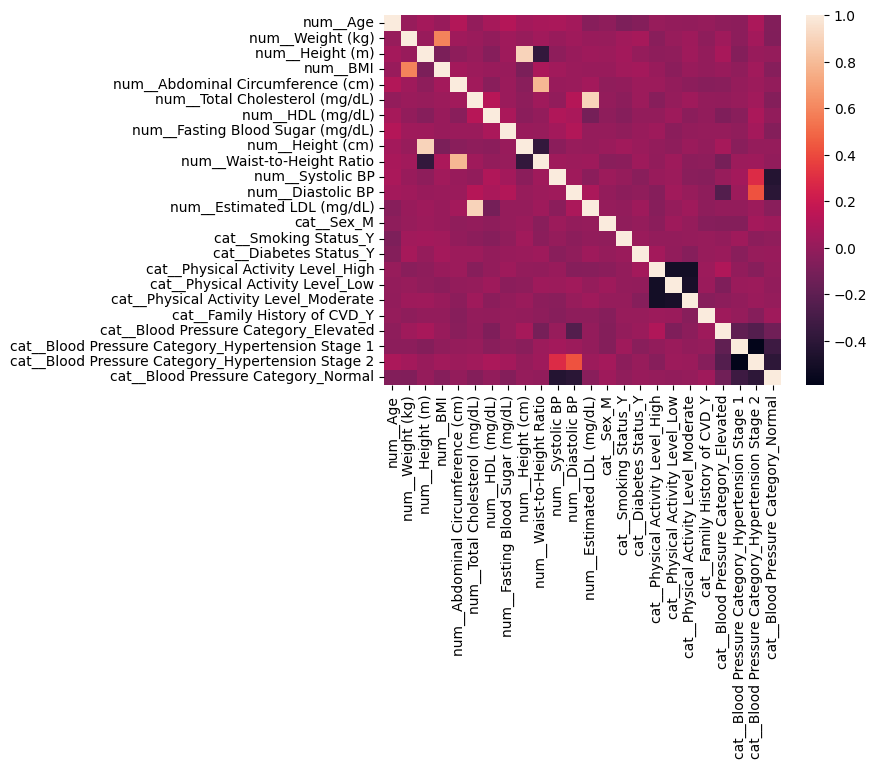

In [2594]:
sns.heatmap(Xt_train_df.corr(numeric_only=True))

### Normalidad de los errores

- **H0 (supuesto)**: los residuos provienen de una distribución **normal** (Shapiro–Wilk).   
- Si el **p-value < 0.05**, se rechaza H0: hay evidencia de que los residuos **no** son normales.   
- Si el **p-value ≥ 0.05**, no se rechaza H0: no hay evidencia suficiente contra la normalidad de los residuos.   

In [2595]:
# Residuales en train
residuales = np.array(y_train - y_train_pred)

estat, p_shapiro = shapiro(residuales)
print("Shapiro-Wilk p-value:", p_shapiro)

Shapiro-Wilk p-value: 1.7297527425344985e-47


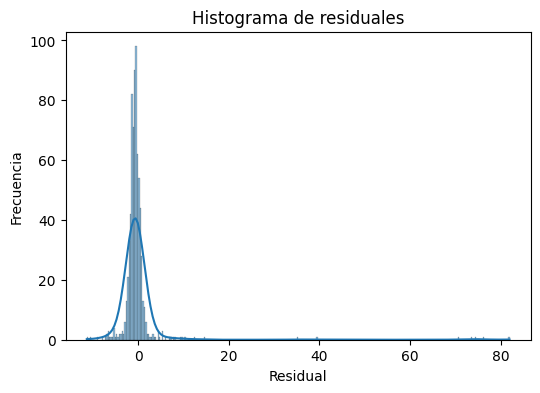

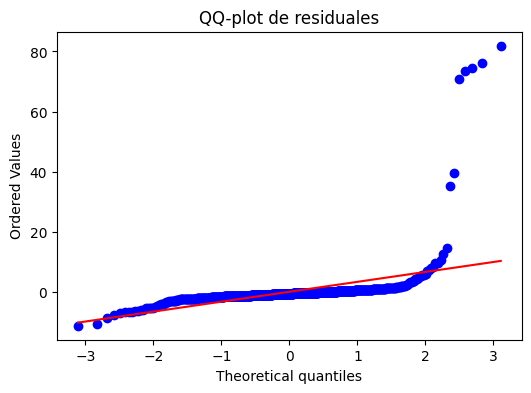

In [2596]:
# Histograma
plt.figure(figsize=(6, 4))
sns.histplot(residuales, kde=True)
plt.title("Histograma de residuales")
plt.xlabel("Residual")
plt.ylabel("Frecuencia")
plt.show()

# 2. QQ-plot
plt.figure(figsize=(6, 4))
stats.probplot(residuales, dist="norm", plot=plt)
plt.title("QQ-plot de residuales")
plt.show()

### Homecedasticidad

H0: hay homecedasticidad (varianza de los errores constante).

+ Si el **p-value < 0.05**, se rechaza H0: hay evidencia de **heterocedasticidad** (varianza no constante).
+ Si el **p-value ≥ 0.05**, no se rechaza H0: no hay evidencia de heterocedasticidad y el supuesto de homecedasticidad es razonable.

In [2597]:
X_num = Xt_train_df.select_dtypes(include="number").copy()
mask = np.isfinite(X_num).all(axis=1)
X_num_clean = X_num[mask]
resid_clean = residuales[mask]
X_num_const = sm.add_constant(X_num_clean)
bp_stat, bp_pvalue, _, _ = het_breuschpagan(resid_clean, X_num_const)

print("Estadístico Breusch-Pagan:", bp_stat)
print("p-value Breusch-Pagan   :", bp_pvalue)

Estadístico Breusch-Pagan: 20.17058667876161
p-value Breusch-Pagan   : 0.6870349965238292


### Independencia de los errores

$$0≤DW≤4$$

+ Si es $0$ o cercano, nos dice que hay problemas de autocorrelación positiva.
+ Si es $2$ significa que no hay autocorrelación (no hay problemas).
+ Si es $4$ o cercano, indica que hay problemas de autocorrelación negativa.

In [2598]:
dw = durbin_watson(residuales)
print("Durbin-Watson:", dw)

Durbin-Watson: 2.007658599650961


### Linealidad

- **H0 (supuesto)**: el modelo es adecuado con forma **lineal**
- Si el **p-value < 0.05**, se rechaza H0 y hay evidencia de **no linealidad / mala especificación** 
- Si el **p-value ≥ 0.05**, no se rechaza H0: no hay evidencia contra la linealidad y el supuesto de forma funcional lineal se considera razonable.
- Nota: este test asume **homocedasticidad**; si hay heterocedasticidad puede rechazar aunque la especificación lineal sea correcta.


In [2599]:
X_sm = sm.add_constant(Xt_train_df)
modelo_sm = sm.OLS(y_train, X_sm).fit()

rainbow_stat, rainbow_pvalue = linear_rainbow(modelo_sm)

print("Estadístico Rainbow:", rainbow_stat)
print("p-value Rainbow    :", rainbow_pvalue)

Estadístico Rainbow: 0.927810128621582
p-value Rainbow    : 0.7607861388239918


## Modelo 2
### Pipeline

In [2600]:
# --------------------------
# 1) Funciones
# --------------------------

# Columnas a eliminar
colstodrop = [
    "Patient ID",
    "Date of Service",
    "CVD Risk Level",
    "Blood Pressure (mmHg)",
    "Age",
    "Weight (kg)",
    "Height (m)",
    "HDL (mg/dL)",
    "Height (cm)",
    "Diastolic BP",
    "Estimated LDL (mg/dL)",
    "Sex",
    "Smoking Status",
    "Physical Activity Level",
    "Family History of CVD",
    "Blood Pressure Category",
    "Abdominal Circumference (cm)",
    "Fasting Blood Sugar (mg/dL)",
    "Waist-to-Height Ratio",
]

def dropcolumns(df):
    return df.drop(columns=colstodrop, errors="ignore")

dropper = FunctionTransformer(dropcolumns)

# --------------------------
# 2) Features y transformadores
# --------------------------

numericfeatures = [
    # "Age",
    # "Weight (kg)",
    # "Height (m)",
    "BMI",
    # "Abdominal Circumference (cm)",
    "Total Cholesterol (mg/dL)",
    # "HDL (mg/dL)",
    # "Fasting Blood Sugar (mg/dL)",
    # "Height (cm)",
    # "Waist-to-Height Ratio",
    "Systolic BP",
    # "Diastolic BP",
    # "Estimated LDL (mg/dL)",
]

categoricalfeatures = [
    # "Sex",
    # "Smoking Status",
    "Diabetes Status",
    # "Physical Activity Level",
    # "Family History of CVD",
    # "Blood Pressure Category",
]

numerictransformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler()),
])

categoricaltransformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore", drop="if_binary")),
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numerictransformer, numericfeatures),
        ("cat", categoricaltransformer, categoricalfeatures),
    ]
)

# --------------------------
# 3) Pipeline final
# --------------------------

pipe = Pipeline(steps=[
    ("dropper", dropper),
    ("preprocesamiento", preprocessor)
])

### Transformación

In [2601]:
Xt_train = pipe.fit_transform(X_train)
feature_names = pipe.named_steps["preprocesamiento"].get_feature_names_out()
Xt_train_df = pd.DataFrame(
    Xt_train.toarray() if hasattr(Xt_train, "toarray") else Xt_train,
    columns=feature_names,
    index=X_train.index
)

Xt_train_df.head()

,num__BMI,num__Total Cholesterol (mg/dL),num__Systolic BP,cat__Diabetes Status_Y
748,-0.460006,-0.840734,-0.641071,0.0
483,0.353146,0.229521,0.108705,0.0
1197,0.833172,1.420611,1.255422,1.0
41,-0.592243,0.143210,1.387736,0.0
137,-1.353140,-0.564539,0.593855,0.0


### Entrenamiento del modelo de regresión lineal.

In [2602]:
# Modelo = LinearRegression()
# Modelo = Ridge(alpha=1)
Modelo = Lasso(alpha=0.1)

Modelo.fit(Xt_train_df,y_train)

,"alpha alpha: float, default=1.0Constant that multiplies the L1 term, controlling regularizationstrength. `alpha` must be a non-negative float i.e. in `[0, inf)`.When `alpha = 0`, the objective is equivalent to ordinary leastsquares, solved by the :class:`LinearRegression` object. For numericalreasons, using `alpha = 0` with the `Lasso` object is not advised.Instead, you should use the :class:`LinearRegression` object.",0.1
,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"precompute precompute: bool or array-like of shape (n_features, n_features), default=FalseWhether to use a precomputed Gram matrix to speed upcalculations. The Gram matrix can also be passed as argument.For sparse input this option is always ``False`` to preserve sparsity.",False
,"copy_X copy_X: bool, default=TrueIf ``True``, X will be copied; else, it may be overwritten.",True
,"max_iter max_iter: int, default=1000The maximum number of iterations.",1000
,"tol tol: float, default=1e-4The tolerance for the optimization: if the updates are smaller or equal to``tol``, the optimization code checks the dual gap for optimality and continuesuntil it is smaller or equal to ``tol``, see Notes below.",0.0001
,"warm_start warm_start: bool, default=FalseWhen set to ``True``, reuse the solution of the previous call to fit asinitialization, otherwise, just erase the previous solution.See :term:`the Glossary `.",False
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive.",False
,"random_state random_state: int, RandomState instance, default=NoneThe seed of the pseudo random number generator that selects a randomfeature to update. Used when ``selection`` == 'random'.Pass an int for reproducible output across multiple function calls.See :term:`Glossary `.",None
,"selection selection: {'cyclic', 'random'}, default='cyclic'If set to 'random', a random coefficient is updated every iterationrather than looping over features sequentially by default. This(setting to 'random') often leads to significantly faster convergenceespecially when tol is higher than 1e-4.",'cyclic'


# Evaluación cuantitativa

### Validación del modelo

In [2603]:
y_train_pred = Modelo.predict(Xt_train_df)

mae_train = mean_absolute_error(y_train, y_train_pred)
print("MAE  train:", mae_train)

mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
print("RMSE train:", rmse_train)

r2_train = r2_score(y_train, y_train_pred)
print("R²   train:", r2_train)

MAE  train: 1.701947274570236
RMSE train: 6.882537318009287
R²   train: 0.12873950232083597


### Estimación de la capacidad de generalización del modelo.

In [2604]:
Xt_test = pipe.transform(X_test)

feature_names = pipe.named_steps["preprocesamiento"].get_feature_names_out()
Xt_test_df = pd.DataFrame(
    Xt_test.toarray() if hasattr(Xt_test, "toarray") else Xt_test,
    columns=feature_names,
    index=X_test.index
)

y_test_pred = Modelo.predict(Xt_test_df) # predicciones

mae_test = mean_absolute_error(y_test, y_test_pred)
print("MAE  test :", mae_test)

mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
print("RMSE test :", rmse_test)

r2_test = r2_score(y_test, y_test_pred)
print("R²   test :", r2_test)

MAE  test : 2.384034036445749
RMSE test : 8.430874898573924
R²   test : 0.06293505889193707


# Evaluación cualitativa

### Coeficientes

In [2605]:
feature_names = pipe.named_steps["preprocesamiento"].get_feature_names_out()
feature_names = [
    name.replace("num__", "").replace("cat__", "")
    for name in feature_names
]
coef_df = pd.DataFrame({
    "Variable": feature_names,
    "Coeficiente": Modelo.coef_
})
coef_df

,Variable,Coeficiente
0,BMI,1.820264
1,Total Cholesterol (mg/dL),0.786418
2,Systolic BP,0.894421
3,Diabetes Status_Y,1.809236


### Multicolinealidad

$$
VIF = \frac{1}{1 - R^2}
$$

Tendremos un valor de **VIF** por cada una de las variables predictoras que se puede interpretar de la siguiente forma: 

* $VIF > 4$: Se tiene problema de Multicolinealidad

* $VIF <= 4$: No hay problema de Multicolinealidad

In [2606]:
X_vif = Xt_train_df.select_dtypes(include="number").copy()
clean_columns = (
    X_vif.columns
         .str.replace("^num__", "", regex=True)
         .str.replace("^cat__", "", regex=True)
)
vif_values = []
with np.errstate(divide="ignore", invalid="ignore"):
    for i in range(X_vif.shape[1]):
        vif = variance_inflation_factor(X_vif.values, i)
        vif_values.append(vif)

vif_data = pd.DataFrame({
    "Variable": clean_columns,
    "VIF": vif_values
})
print(vif_data)

                    Variable       VIF
0                        BMI  1.004713
1  Total Cholesterol (mg/dL)  1.001332
2                Systolic BP  1.002961
3          Diabetes Status_Y  1.002994


<Axes: >

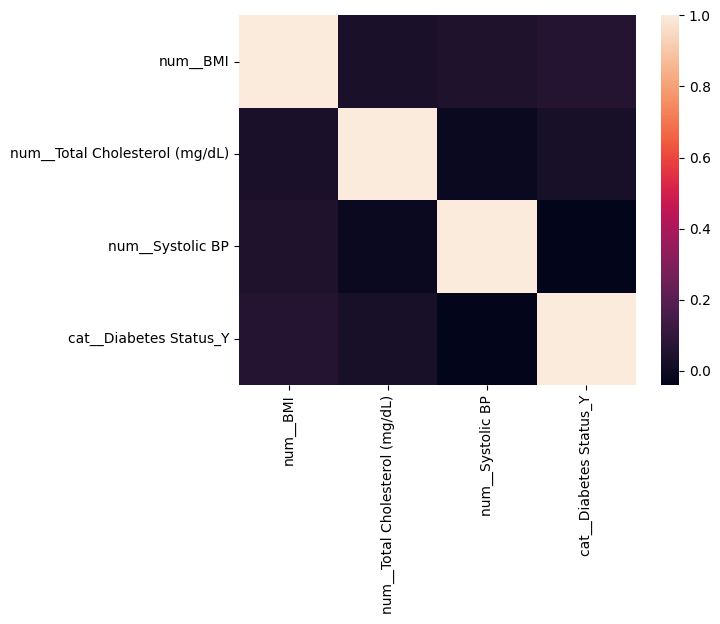

In [2607]:
sns.heatmap(Xt_train_df.corr(numeric_only=True))

### Normalidad de los errores

- **H0 (supuesto)**: los residuos provienen de una distribución **normal** (Shapiro–Wilk).   
- Si el **p-value < 0.05**, se rechaza H0: hay evidencia de que los residuos **no** son normales.   
- Si el **p-value ≥ 0.05**, no se rechaza H0: no hay evidencia suficiente contra la normalidad de los residuos.   

In [2608]:
# Residuales en train
residuales = np.array(y_train - y_train_pred)

estat, p_shapiro = shapiro(residuales)
print("Shapiro-Wilk p-value:", p_shapiro)

Shapiro-Wilk p-value: 2.2425721444079807e-48


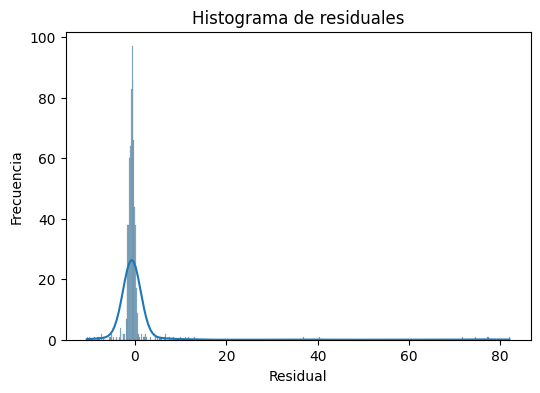

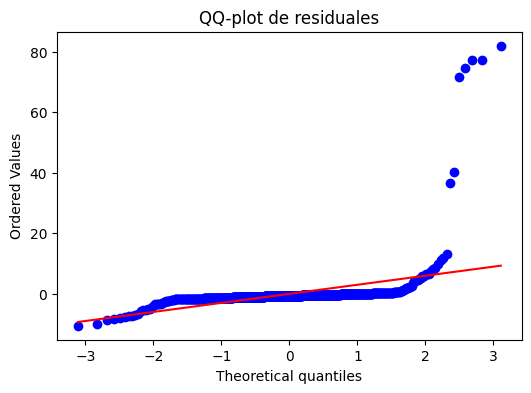

In [2609]:
# Histograma
plt.figure(figsize=(6, 4))
sns.histplot(residuales, kde=True)
plt.title("Histograma de residuales")
plt.xlabel("Residual")
plt.ylabel("Frecuencia")
plt.show()

# 2. QQ-plot
plt.figure(figsize=(6, 4))
stats.probplot(residuales, dist="norm", plot=plt)
plt.title("QQ-plot de residuales")
plt.show()

### Homecedasticidad

H0: hay homecedasticidad (varianza de los errores constante).

+ Si el **p-value < 0.05**, se rechaza H0: hay evidencia de **heterocedasticidad** (varianza no constante).
+ Si el **p-value ≥ 0.05**, no se rechaza H0: no hay evidencia de heterocedasticidad y el supuesto de homecedasticidad es razonable.

In [2610]:
X_num = Xt_train_df.select_dtypes(include="number").copy()
mask = np.isfinite(X_num).all(axis=1)
X_num_clean = X_num[mask]
resid_clean = residuales[mask]
X_num_const = sm.add_constant(X_num_clean)
bp_stat, bp_pvalue, _, _ = het_breuschpagan(resid_clean, X_num_const)

print("Estadístico Breusch-Pagan:", bp_stat)
print("p-value Breusch-Pagan   :", bp_pvalue)

Estadístico Breusch-Pagan: 7.415631396652456
p-value Breusch-Pagan   : 0.11548765288257794


### Independencia de los errores

$$0≤DW≤4$$

+ Si es $0$ o cercano, nos dice que hay problemas de autocorrelación positiva.
+ Si es $2$ significa que no hay autocorrelación (no hay problemas).
+ Si es $4$ o cercano, indica que hay problemas de autocorrelación negativa.

In [2611]:
dw = durbin_watson(residuales)
print("Durbin-Watson:", dw)

Durbin-Watson: 2.006813193012857


### Linealidad

- **H0 (supuesto)**: el modelo es adecuado con forma **lineal**
- Si el **p-value < 0.05**, se rechaza H0 y hay evidencia de **no linealidad / mala especificación** 
- Si el **p-value ≥ 0.05**, no se rechaza H0: no hay evidencia contra la linealidad y el supuesto de forma funcional lineal se considera razonable.
- Nota: este test asume **homocedasticidad**; si hay heterocedasticidad puede rechazar aunque la especificación lineal sea correcta.


In [2612]:
X_sm = sm.add_constant(Xt_train_df)
modelo_sm = sm.OLS(y_train, X_sm).fit()

rainbow_stat, rainbow_pvalue = linear_rainbow(modelo_sm)

print("Estadístico Rainbow:", rainbow_stat)
print("p-value Rainbow    :", rainbow_pvalue)

Estadístico Rainbow: 0.9588903385804758
p-value Rainbow    : 0.6560775747607877


# Conclusiones

# Uso del modelo - Dataset de prueba

In [2613]:
# Leer el dataset de prueba
test_df = pd.read_csv(TEST_FILE, sep=";")
test_df.head()

,Patient ID,Date of Service,Sex,Age,Weight (kg),Height (m),BMI,Abdominal Circumference (cm),Blood Pressure (mmHg),Total Cholesterol (mg/dL),...,Smoking Status,Diabetes Status,Physical Activity Level,Family History of CVD,Height (cm),Waist-to-Height Ratio,Systolic BP,Diastolic BP,Blood Pressure Category,Estimated LDL (mg/dL)
0,WYTG8678,1/12/2021,M,44.0,51.936,1.936,36.442,115.755,105/108,107.0,...,Y,Y,Low,N,193.61,0.598,105.0,108.0,Hypertension Stage 2,25.0
1,yloc1993,12-25-2020,F,30.0,115.000,1.830,34.300,93.600,139/79,100.0,...,Y,N,Moderate,N,183.00,0.511,139.0,79.0,Hypertension Stage 1,39.0
2,DDwq7653,23-sep-21,M,38.0,63.300,1.700,21.900,93.800,93/67,NaN,...,N,Y,High,N,170.00,0.552,93.0,67.0,Normal,182.0
3,YTcX6704,3/03/2021,F,58.0,72.300,1.740,23.900,91.600,99/90,208.0,...,N,N,High,N,174.00,0.526,99.0,90.0,Hypertension Stage 2,115.0
4,lZLi8935,06-14-2022,M,51.0,57.600,1.810,17.600,100.000,97/84,137.0,...,Y,N,High,N,181.00,0.552,97.0,84.0,Hypertension Stage 1,59.0
